In [1]:
from IPython.display import Image



In [2]:
!pip install chart-studio


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Visualization libraries
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import chart_studio.plotly as py
from plotly.graph_objs import *
from IPython.display import Image
pd.set_option('display.max_rows', None)

import plotly.graph_objs as go
from plotly import tools
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode()



from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import pandas as pd






In [25]:
seasons_df = pd.read_csv("seasons.csv", encoding='latin')
circuits_df = pd.read_csv("circuits.csv", encoding='latin')
drivers_df = pd.read_csv("drivers.csv", encoding='latin')
races_df = pd.read_csv("races.csv", encoding='latin')
results_df = pd.read_csv("results.csv", encoding='latin')
status_df = pd.read_csv("status.csv", encoding='latin')
constructors_df = pd.read_csv("seasons.csv", encoding='latin')
qualifying_df = pd.read_csv("qualifying.csv", encoding='latin')
constructors_df = pd.read_csv("constructors.csv", encoding='latin')



In [26]:
seasons_df.head()

year                                                url
0  2009  https://en.wikipedia.org/wiki/2009_Formula_One...
1  2008  https://en.wikipedia.org/wiki/2008_Formula_One...
2  2007  https://en.wikipedia.org/wiki/2007_Formula_One...
3  2006  https://en.wikipedia.org/wiki/2006_Formula_One...
4  2005  https://en.wikipedia.org/wiki/2005_Formula_One...

In [27]:
circuits_df.head()

circuitId   circuitRef                            name      location  \
0          1  albert_park  Albert Park Grand Prix Circuit     Melbourne   
1          2       sepang    Sepang International Circuit  Kuala Lumpur   
2          3      bahrain   Bahrain International Circuit        Sakhir   
3          4    catalunya  Circuit de Barcelona-Catalunya     MontmelÃ³   
4          5     istanbul                   Istanbul Park      Istanbul   

     country       lat        lng  alt  \
0  Australia -37.84970  144.96800   10   
1   Malaysia   2.76083  101.73800   18   
2    Bahrain  26.03250   50.51060    7   
3      Spain  41.57000    2.26111  109   
4     Turkey  40.95170   29.40500  130   

                                                 url  
0  http://en.wikipedia.org/wiki/Melbourne_Grand_P...  
1  http://en.wikipedia.org/wiki/Sepang_Internatio...  
2  http://en.wikipedia.org/wiki/Bahrain_Internati...  
3  http://en.wikipedia.org/wiki/Circuit_de_Barcel...  
4         http://en.wikipedia.org/wiki/Istanbul_Park

In [28]:
drivers_df.head()

driverId   driverRef number code  forename     surname         dob  \
0         1    hamilton     44  HAM     Lewis    Hamilton  1985-01-07   
1         2    heidfeld     \N  HEI      Nick    Heidfeld  1977-05-10   
2         3     rosberg      6  ROS      Nico     Rosberg  1985-06-27   
3         4      alonso     14  ALO  Fernando      Alonso  1981-07-29   
4         5  kovalainen     \N  KOV    Heikki  Kovalainen  1981-10-19   

  nationality                                             url  
0     British     http://en.wikipedia.org/wiki/Lewis_Hamilton  
1      German      http://en.wikipedia.org/wiki/Nick_Heidfeld  
2      German       http://en.wikipedia.org/wiki/Nico_Rosberg  
3     Spanish    http://en.wikipedia.org/wiki/Fernando_Alonso  
4     Finnish  http://en.wikipedia.org/wiki/Heikki_Kovalainen

In [29]:
races_df.head()

raceId  year  round  circuitId                   name        date  \
0       1  2009      1          1  Australian Grand Prix  2009-03-29   
1       2  2009      2          2   Malaysian Grand Prix  2009-04-05   
2       3  2009      3         17     Chinese Grand Prix  2009-04-19   
3       4  2009      4          3     Bahrain Grand Prix  2009-04-26   
4       5  2009      5          4     Spanish Grand Prix  2009-05-10   

       time                                                url  
0  06:00:00  http://en.wikipedia.org/wiki/2009_Australian_G...  
1  09:00:00  http://en.wikipedia.org/wiki/2009_Malaysian_Gr...  
2  07:00:00  http://en.wikipedia.org/wiki/2009_Chinese_Gran...  
3  12:00:00  http://en.wikipedia.org/wiki/2009_Bahrain_Gran...  
4  12:00:00  http://en.wikipedia.org/wiki/2009_Spanish_Gran...

In [30]:
results_df.head()

resultId  raceId  driverId  constructorId number  grid position  \
0         1      18         1              1     22     1        1   
1         2      18         2              2      3     5        2   
2         3      18         3              3      7     7        3   
3         4      18         4              4      5    11        4   
4         5      18         5              1     23     3        5   

  positionText  positionOrder  points  laps         time milliseconds  \
0            1              1    10.0    58  1:34:50.616      5690616   
1            2              2     8.0    58       +5.478      5696094   
2            3              3     6.0    58       +8.163      5698779   
3            4              4     5.0    58      +17.181      5707797   
4            5              5     4.0    58      +18.014      5708630   

  fastestLap rank fastestLapTime fastestLapSpeed  statusId  
0         39    2       1:27.452         218.300         1  
1         41    3       1:27.739         217.586         1  
2         41    5       1:28.090         216.719         1  
3         58    7       1:28.603         215.464         1  
4         43    1       1:27.418         218.385         1

# removing the irrelevant columns
cols_to_drop = ["positionOrder","position"]
results_df = results_df.drop(columns=cols_to_drop,axis=1)
# first five rows of dataframe after removing columns
results_df.head()

deep_results_df = results_df.copy(deep = True)

numerical_columns = [col for col in results_df.columns if
                     (results_df[col].dtype=='int64' 
                      or results_df[col].dtype=='float64') 
                     and col != 'Exited']

results_df[numerical_columns].describe().loc[['min','max', 'mean','50%'],:]

In [31]:
results_df[results_df['fastestLapTime'] == results_df['fastestLapTime'].min()]

resultId  raceId  driverId  constructorId number  grid position  \
24928     24934    1046       847            131     63     2        9   

      positionText  positionOrder  points  laps     time milliseconds  \
24928            9              9     3.0    87  +18.556      5493670   

      fastestLap rank fastestLapTime fastestLapSpeed  statusId  
24928         80    1       0:55.404         230.214         1

In [32]:
status_df.head()

statusId        status
0         1      Finished
1         2  Disqualified
2         3      Accident
3         4     Collision
4         5        Engine

In [33]:
constructors_df.head()

constructorId constructorRef        name nationality  \
0              1        mclaren     McLaren     British   
1              2     bmw_sauber  BMW Sauber      German   
2              3       williams    Williams     British   
3              4        renault     Renault      French   
4              5     toro_rosso  Toro Rosso     Italian   

                                                 url  
0               http://en.wikipedia.org/wiki/McLaren  
1            http://en.wikipedia.org/wiki/BMW_Sauber  
2  http://en.wikipedia.org/wiki/Williams_Grand_Pr...  
3  http://en.wikipedia.org/wiki/Renault_in_Formul...  
4   http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso

##                                          Visualize the Grand Prix Timeline


In [34]:
fig = go.Figure(go.Bar(
    x = races_df['year'],
    y = races_df['name'],
    text=['Bar Chart'],
    name='Grand Prix',
    marker_color=races_df['circuitId']
))

fig.update_layout(
    height=800,
    title_text='Grand Prix Timeline',
    showlegend=True
)

fig.show()


In [35]:
results = pd.merge(drivers_df,results_df, on='driverId',how='inner')
len(results.loc[(results_df['positionOrder'] == 1) & (results_df['driverId'] == 1)])

100

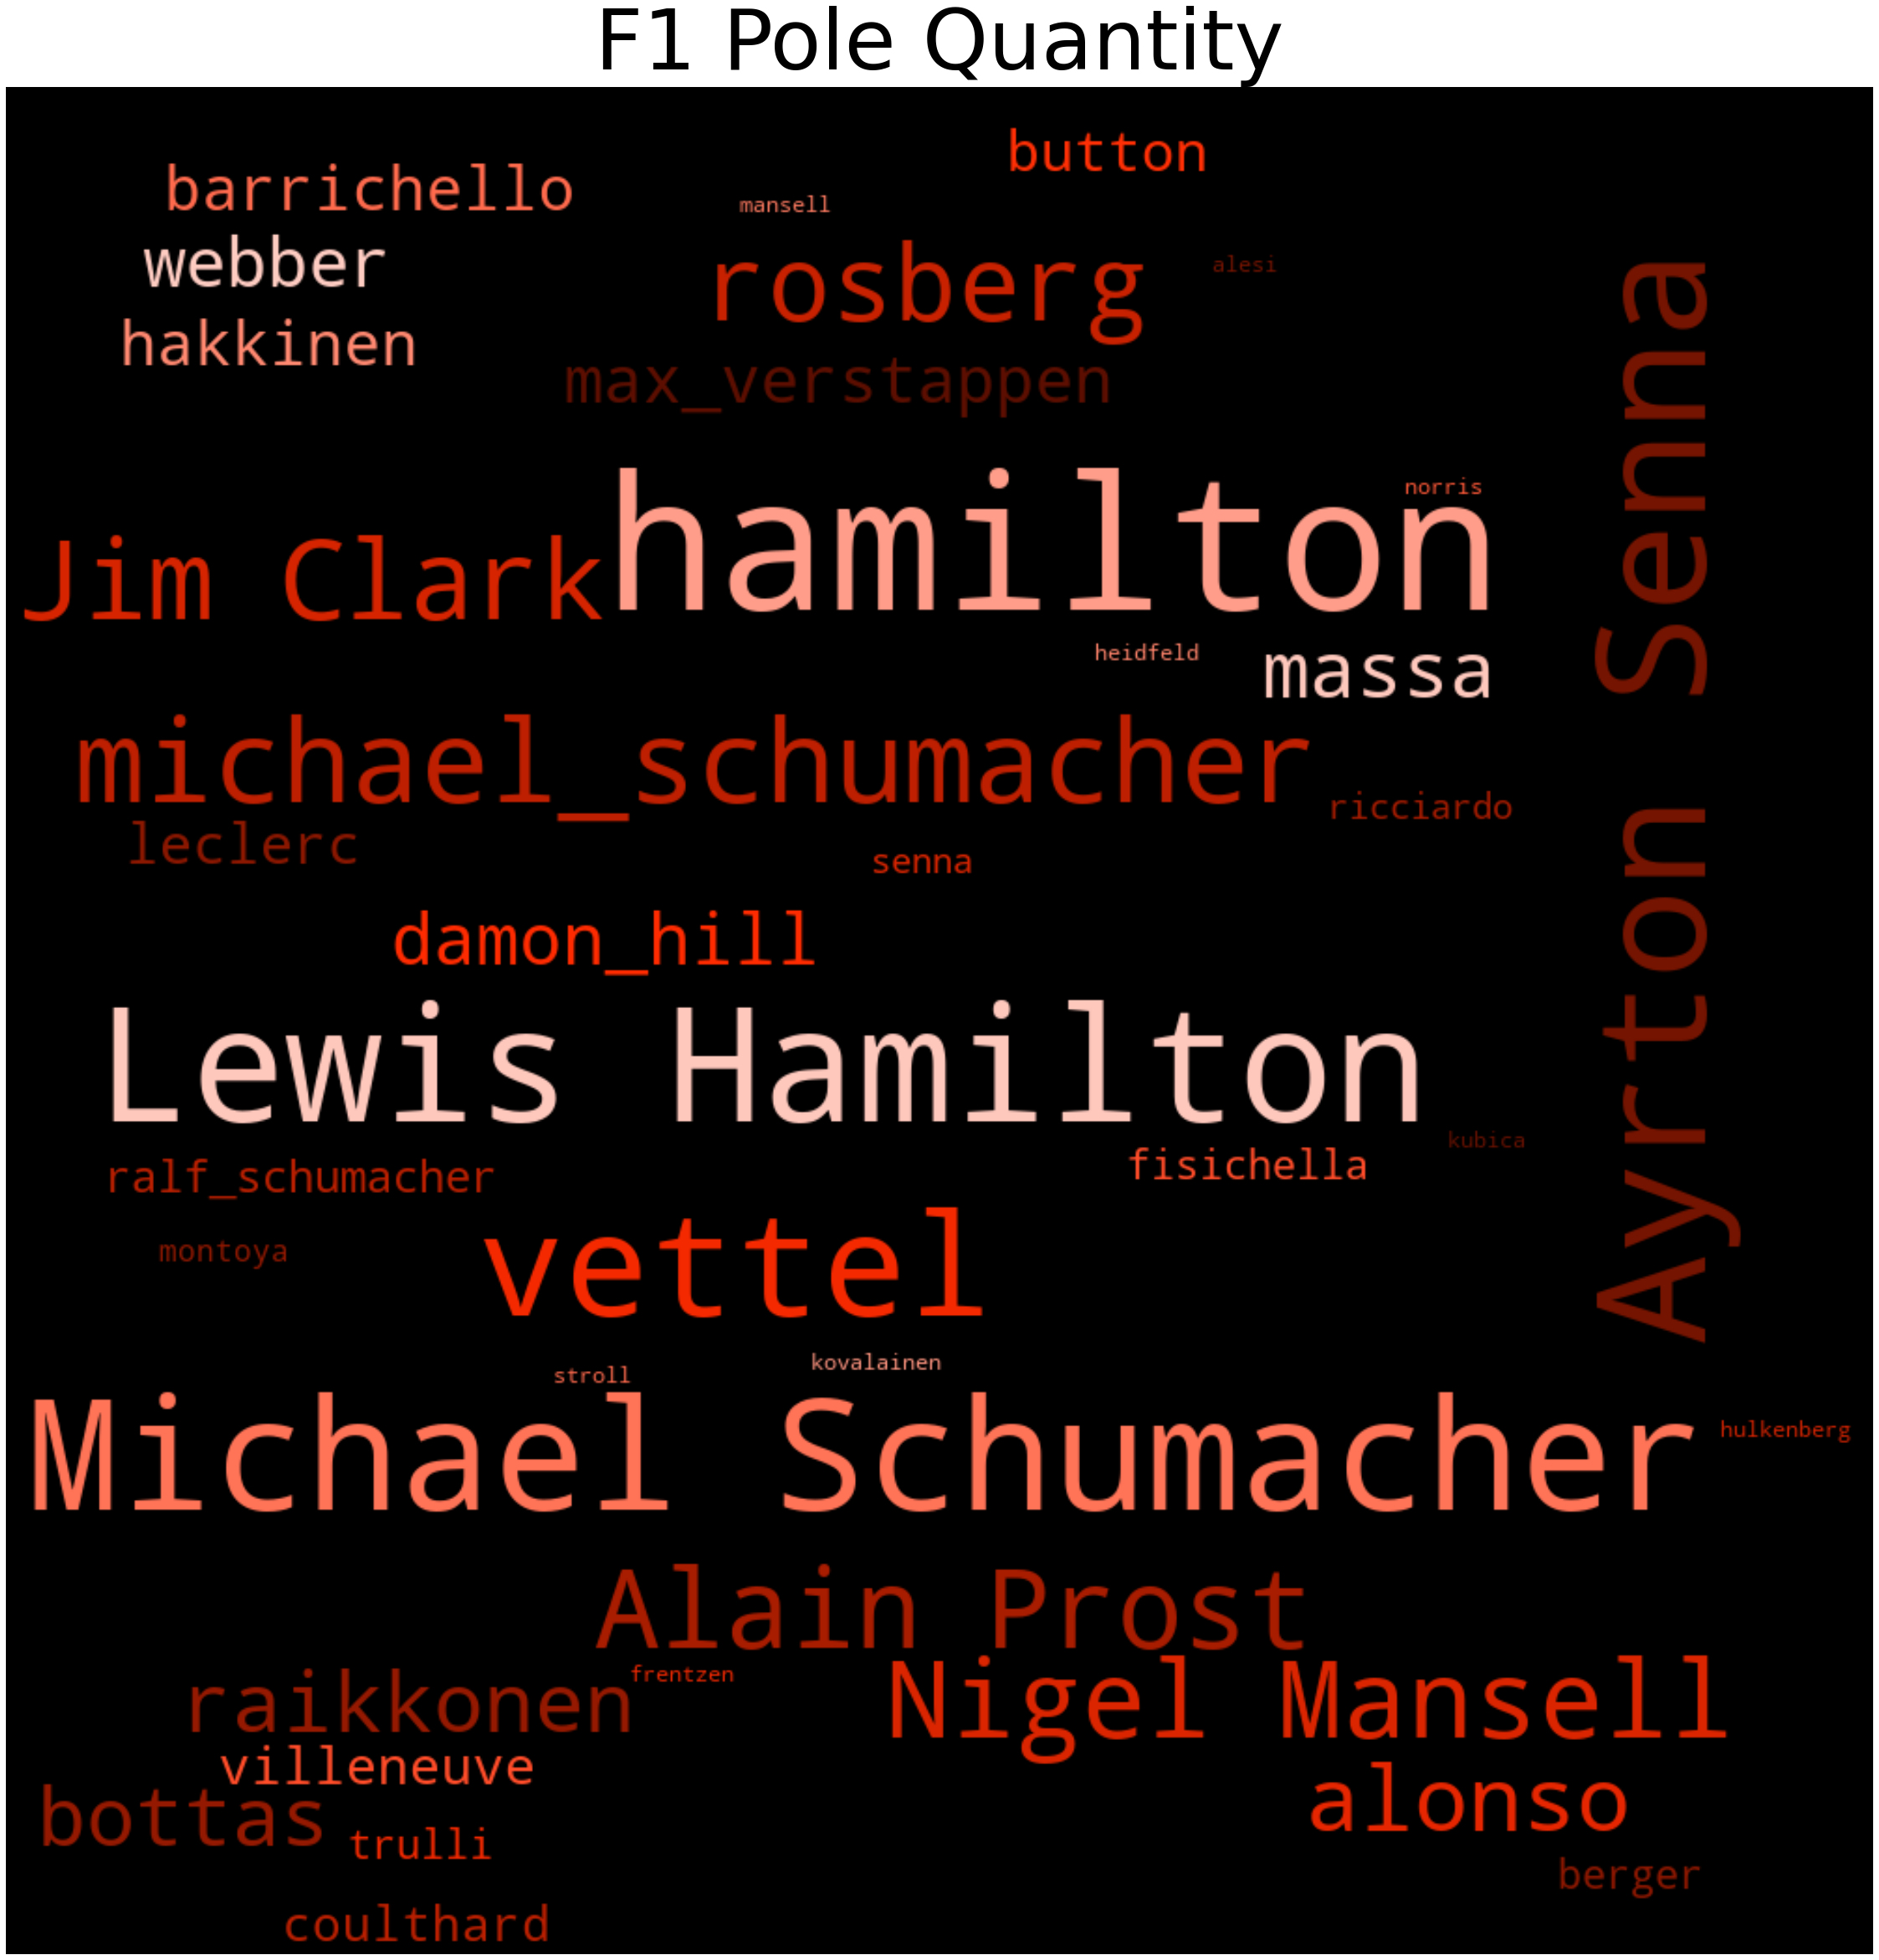

In [36]:
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import random

import matplotlib

import matplotlib.pyplot as plt


def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(10, 100%%, %d%%)" % random.randint(15, 90)

q = pd.merge(qualifying_df,drivers_df,how='inner',on='driverId')
q = pd.merge(q,races_df,how='inner',on=['raceId'])
q = q.loc[q['position']==1]

array = list(q.loc[q['position']== 1]['driverRef'].values)

word_could_dict=Counter(array)
##CORRECTING THE DATASET, BECAUSE DATASET OF QUALIFICATION IS MISSING SOME DATA
word_could_dict['Lewis Hamilton'] = 72
word_could_dict['Michael Schumacher'] = 68
word_could_dict['Ayrton Senna'] = 65
word_could_dict['Alain Prost'] = 33
word_could_dict['Jim Clark'] = 33
word_could_dict['Nigel Mansell'] = 32
word_could_dict['Kimi RÌ_ikkÌ¦nen'] = 0
word_could_dict['Kimi Raikkonen'] = word_could_dict['Kimi RÌ_ikkÌ¦nen']
word_could_dict['Mika Hakkinen'] = word_could_dict['Mika HÌ_kkinen']
word_could_dict.pop('Kimi RÌ_ikkÌ¦nen')
##word_could_dict.pop('Mika HÌ_kkinen')
################################################################################
wordcloud = WordCloud(width = 1000, height = 1000, max_font_size=100).generate_from_frequencies(word_could_dict)
default_colors = wordcloud.to_array()
plt.figure(figsize=(40,50))
plt.title("F1 Pole Quantity",fontsize=100)
plt.axis("off")
plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")
plt.show()

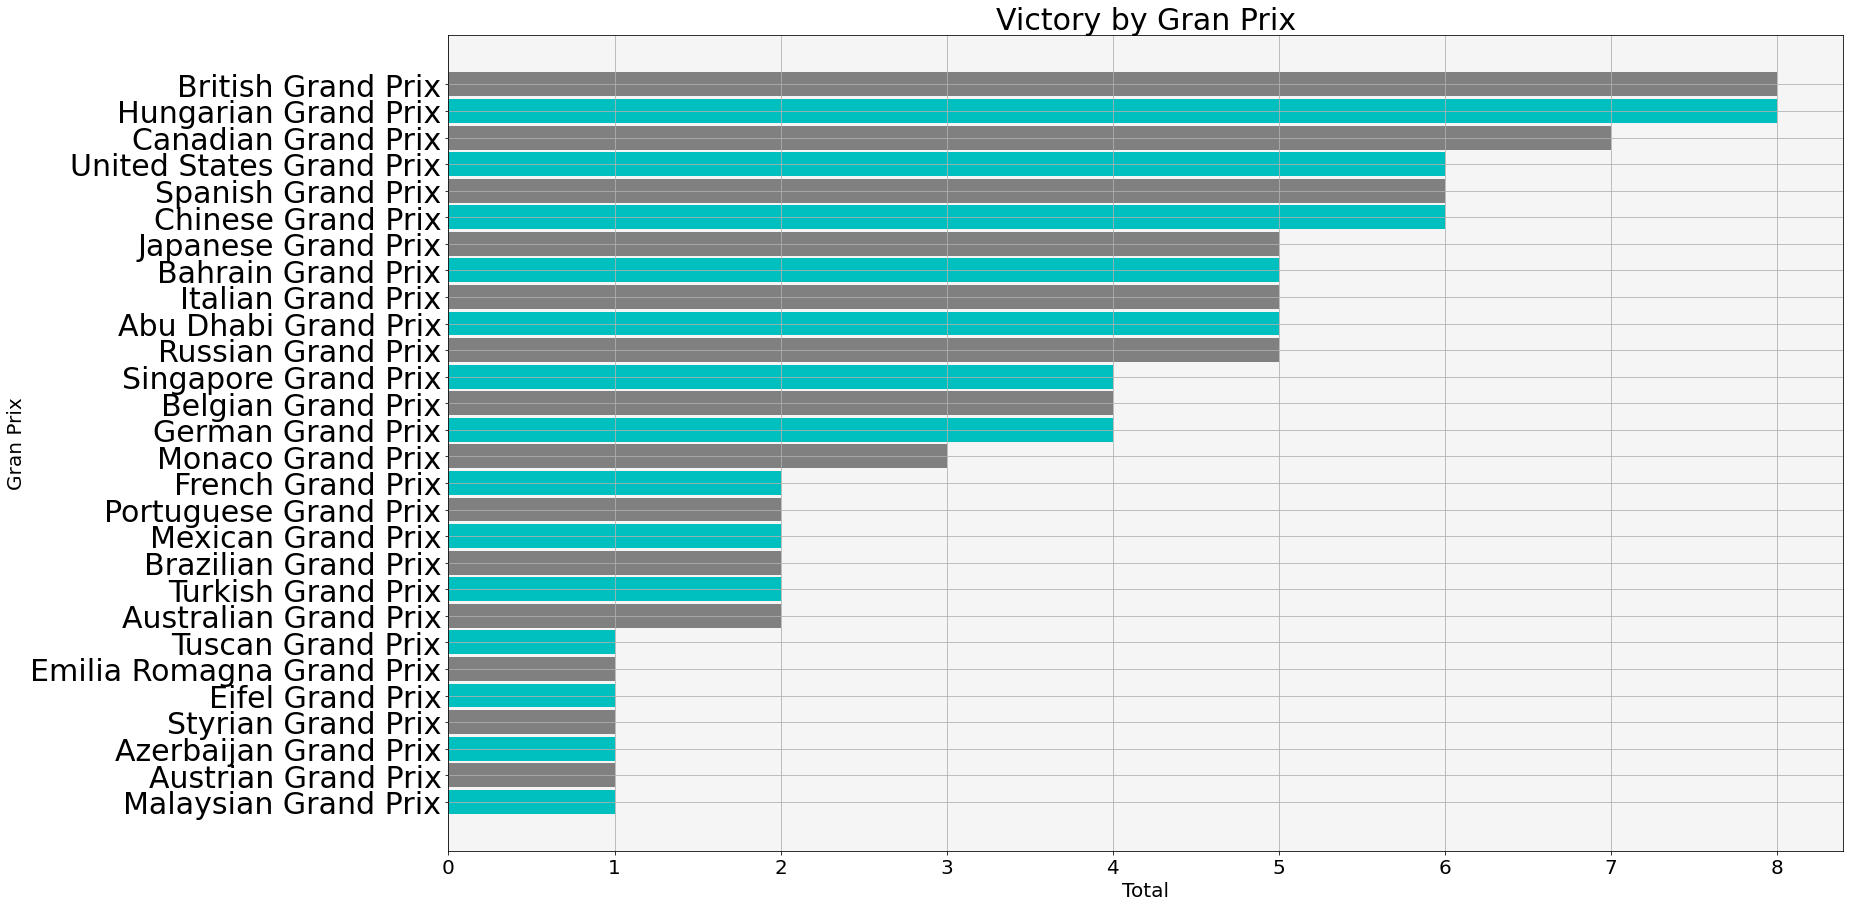

In [37]:
gb = pd.merge(results.loc[results['driverId'] == 1],races_df, on='raceId',how='inner')
gb = gb.loc[gb['positionOrder']==1].groupby('name')['driverId'].count().sort_values()

f,ax = plt.subplots(figsize =(25,15))
ax.tick_params(axis="x", labelsize=20)
ax.tick_params(axis="y", labelsize=30)

ax.barh(list(gb.index), list(gb.values),height = 0.9, color = ['c','gray'])
ax.set_facecolor('whitesmoke')
ax.patch.set_alpha(0.9)
plt.title("Victory by Gran Prix",fontsize=30)
plt.ylabel('Gran Prix',fontsize = 20)
plt.xlabel('Total',fontsize = 20,)
plt.grid()
plt.show()

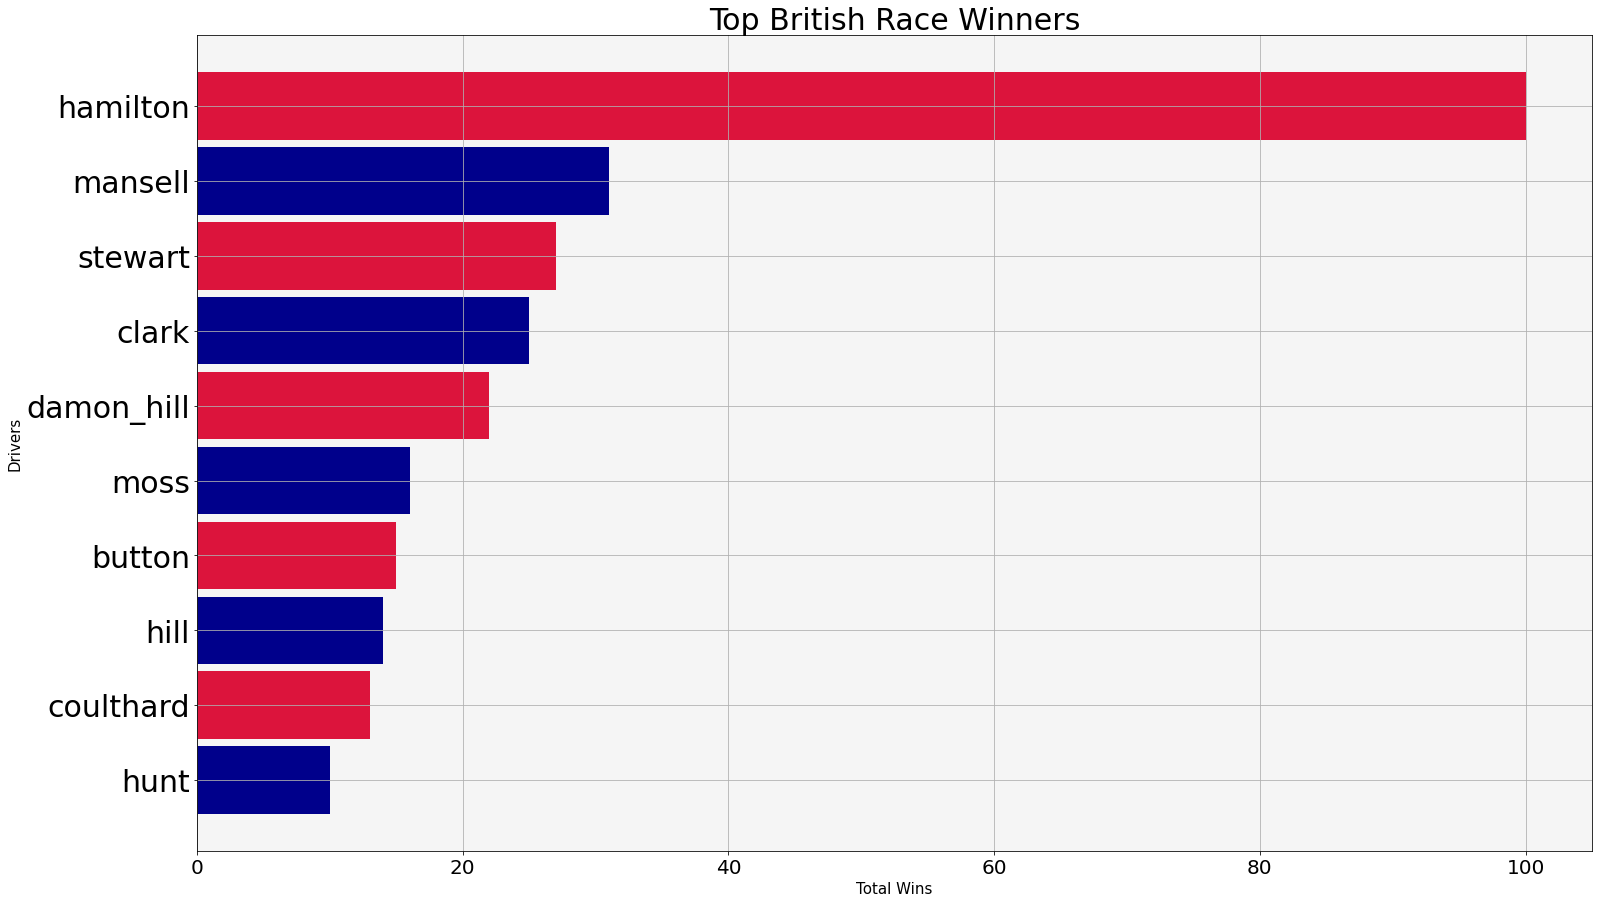

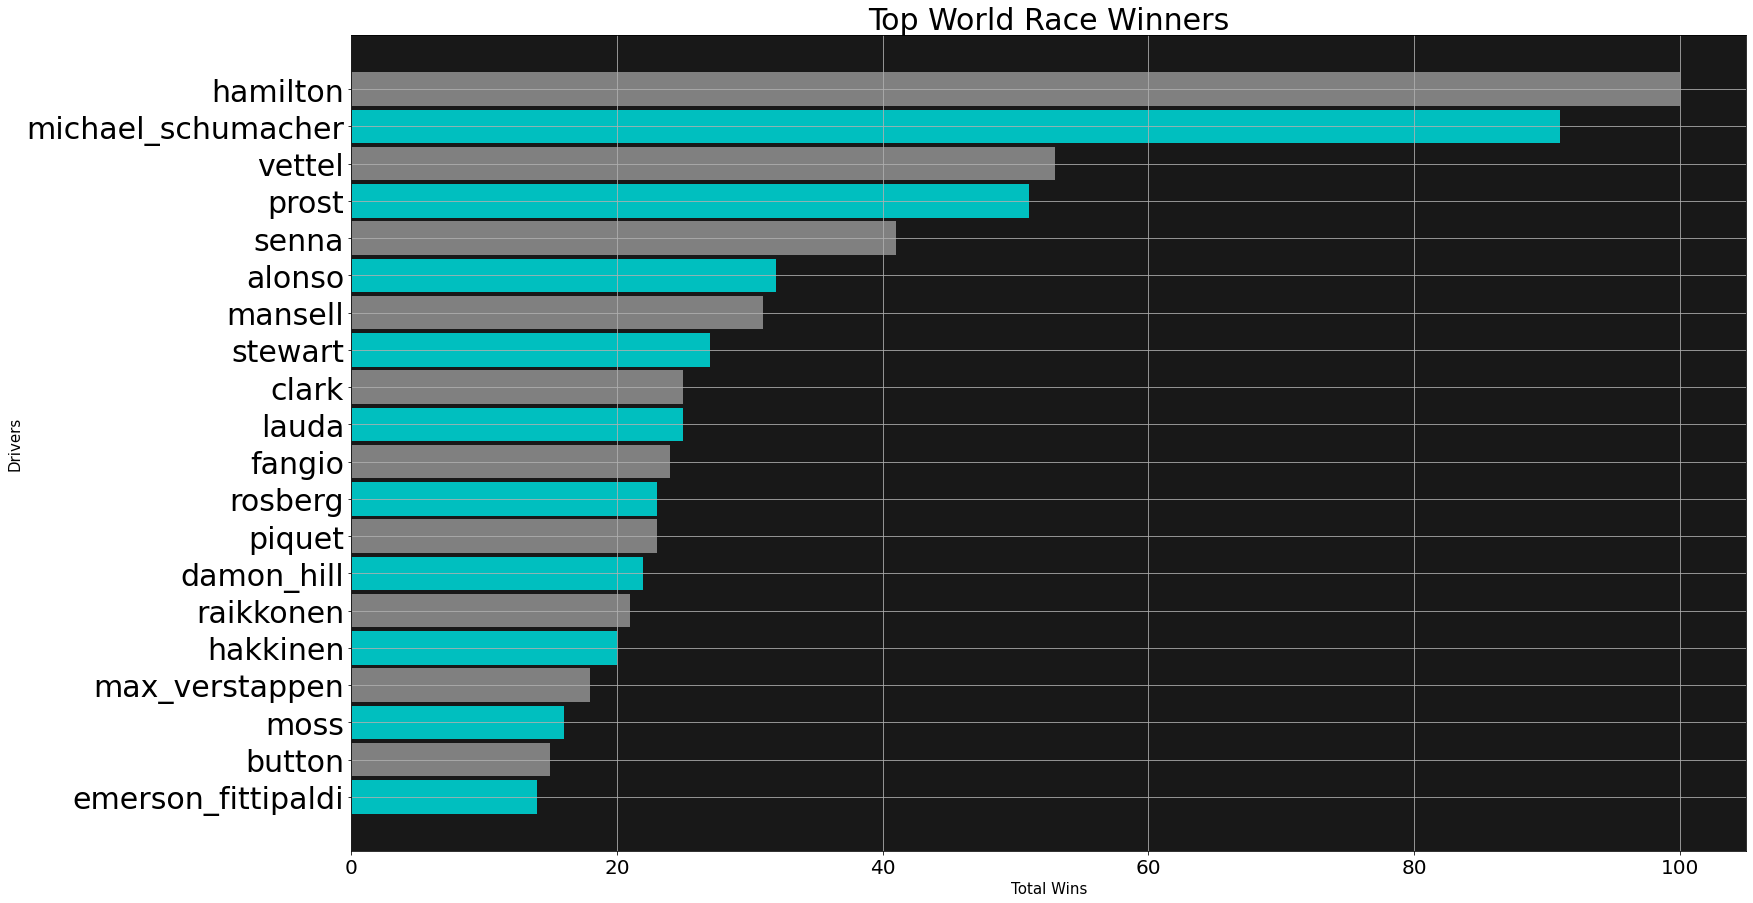

NameError: name 'wins_per_year' is not defined

In [38]:
topBritish = results.loc[(results['nationality'] == 'British') & (results['positionOrder'] == 1)].groupby('driverRef')['raceId'].count().sort_values(ascending=False)[:10]
topBritish = topBritish.sort_values()
topWorld = results.loc[(results['positionOrder'] == 1)].groupby('driverRef')['raceId'].count().sort_values(ascending=False)[:20]
topWorld = topWorld.sort_values()

f,ax = plt.subplots(figsize =(25,15))
ax.tick_params(axis="x", labelsize=20)
ax.tick_params(axis="y", labelsize=30)

ax.barh(list(topBritish.index), list(topBritish.values),height = 0.9, color = ['darkblue','crimson'])
ax.set_facecolor('whitesmoke')
ax.patch.set_alpha(0.9)
plt.title("Top British Race Winners",fontsize=30)
plt.ylabel('Drivers',fontsize = 15)
plt.xlabel('Total Wins',fontsize = 15,)
plt.grid()
plt.show()

f,ax = plt.subplots(figsize =(25,15))
ax.tick_params(axis="x", labelsize=20)
ax.tick_params(axis="y", labelsize=30)

ax.barh(list(topWorld.index), list(topWorld.values),height = 0.9, color = ['c','gray'])
ax.set_facecolor('k')
ax.patch.set_alpha(0.9)
plt.title("Top World Race Winners",fontsize=30)
plt.ylabel('Drivers',fontsize = 15)
plt.xlabel('Total Wins',fontsize = 15,)
plt.grid()
plt.show()

topTenYears = pd.merge(results,races_df,on='raceId',how='inner')
hamWinsPerYear = []
vetWinsPerYear = []
rosWinsPerYear = []
butWinsPerYear = []
aloWinsPerYear = []
for year in range(2007,2018):
    hamWinsPerYear.append(wins_per_year('hamilton',year))
    vetWinsPerYear.append(wins_per_year('vettel',year))
    rosWinsPerYear.append(wins_per_year('rosberg',year))
    butWinsPerYear.append(wins_per_year('button',year))
    aloWinsPerYear.append(wins_per_year('alonso',year))   

x = range(2007,2018)
f,ax = plt.subplots(figsize =(20,10))
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=30)

ax.set_facecolor('whitesmoke')
line1, = ax.plot(x, hamWinsPerYear, label='Hamilton Wins', color='c',linewidth=4,)
line2, = ax.plot(x, vetWinsPerYear, label='Vettel Wins' ,linewidth=2, color='r')
line3, = ax.plot(x, rosWinsPerYear, label='Rosberg Wins', color='k',linewidth=2,)
line4, = ax.plot(x, butWinsPerYear, label='Button Wins' ,linewidth=2, color='gold')
line5, = ax.plot(x, aloWinsPerYear, label='Alonso Wins', color='deeppink',linewidth=2,)
plt.title("Top 5 from the Last 10 years - Wins per Year ",fontsize=30)
plt.ylabel('Total',fontsize = 15)
plt.xlabel('Years',fontsize = 15,)
plt.grid()
ax.legend()
plt.show()

r = pd.merge(df_races,df_results)
r = pd.merge(r,df_drivers)
# winnersYear = []
# for year in :
#     r.loc[r['year']== year].groupby('driverRef')['points'].sum().sort_values(ascending = False).index[0]

schummyCP = championsInYears(np.sort(r['year'].unique()),'michael_schumacher')
fangioCP = championsInYears(np.sort(r['year'].unique()),'fangio')
prostCP = championsInYears(np.sort(r['year'].unique()),'prost')
hamiltonCP = championsInYears(np.sort(r['year'].unique()),'hamilton')
vettelCP = championsInYears(np.sort(r['year'].unique()),'vettel')

x = range(1950,2018)
f,ax = plt.subplots(figsize =(20,10))
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=30)

ax.set_facecolor('whitesmoke')
line1, = ax.plot(x, schummyCP, label='Schumacher World Championships Count', color='r',linewidth=2,)
line2, = ax.plot(x, fangioCP, label='Fangio World Championships Count' ,linewidth=2, color='magenta')
line3, = ax.plot(x, prostCP, label='Prost World Championships Count', color='k',linewidth=2,)
line4, = ax.plot(x, hamiltonCP, label='Hammilton World Championships Count' ,linewidth=4, color='aqua')
line5, = ax.plot(x, vettelCP, label='Vettel World Championships Count', color='darkblue',linewidth=2,)
plt.title("Top 5 from All Time - Championships over the Years ",fontsize=30)
plt.ylabel('Total',fontsize = 15)
plt.xlabel('Years',fontsize = 15,)
plt.grid()
ax.legend()
plt.show()

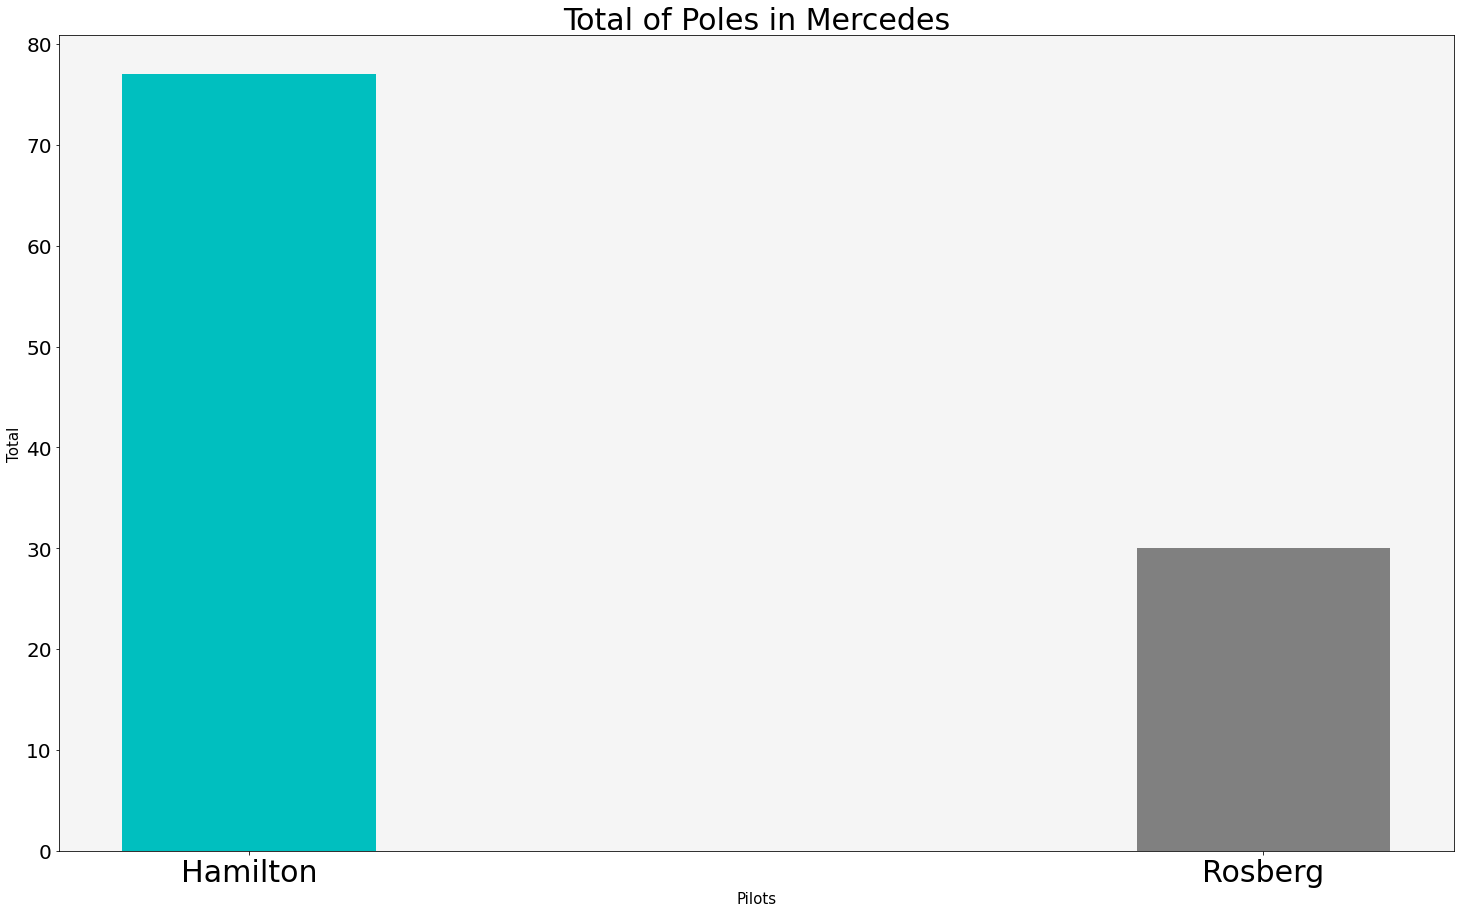

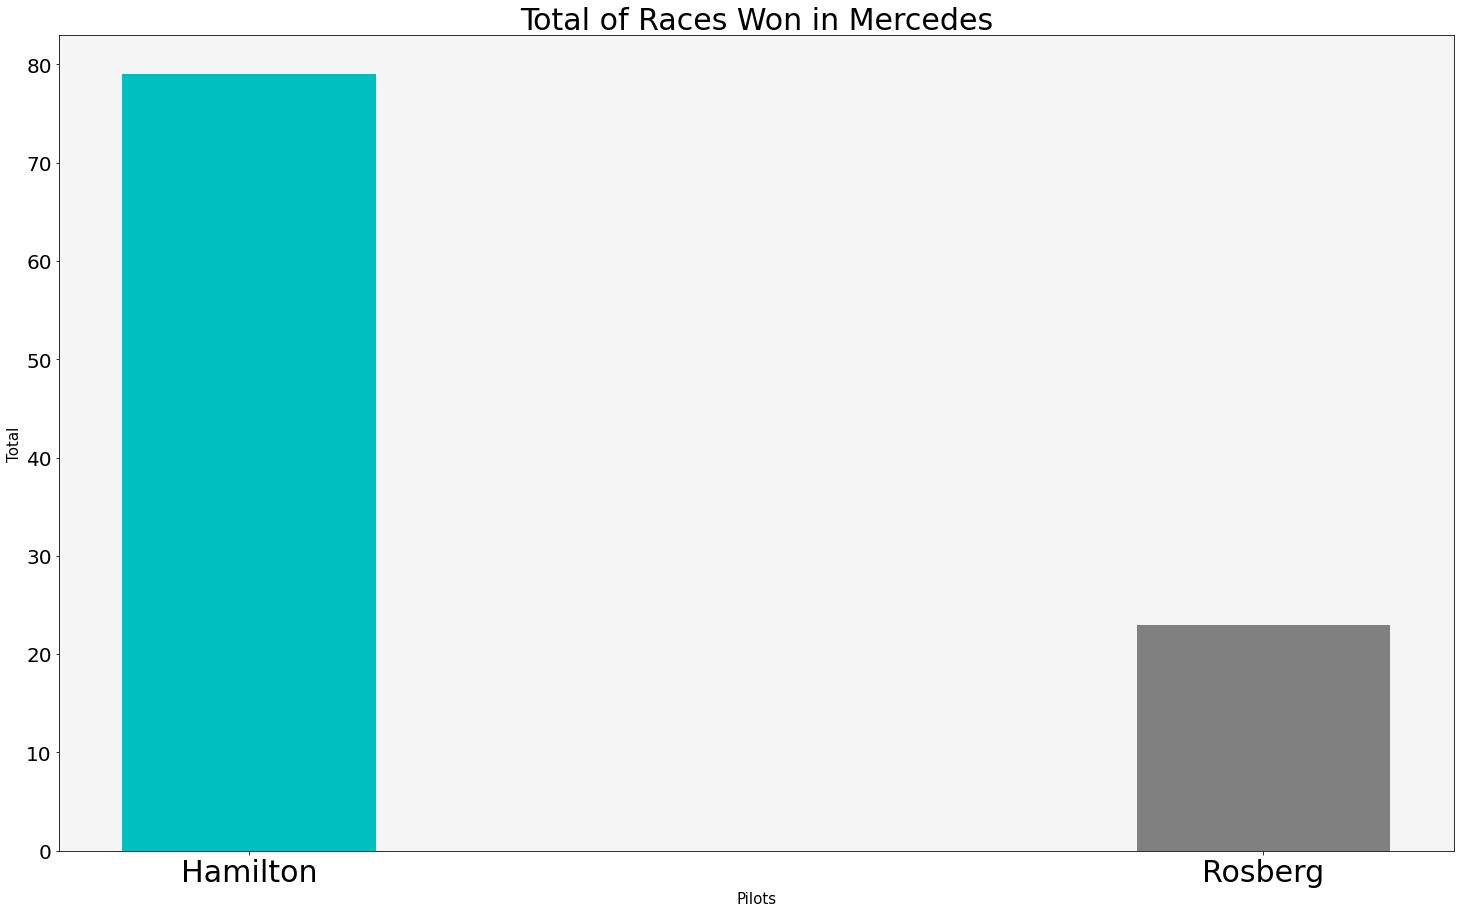

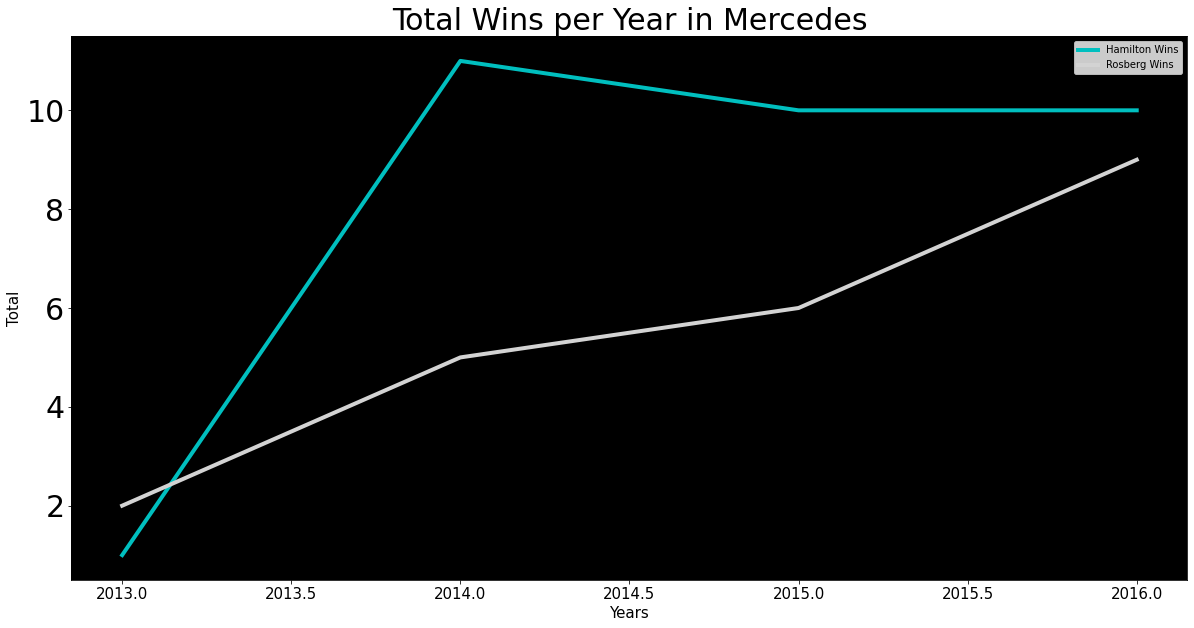

In [53]:
result_races = pd.merge(results_df,races_df, how='inner',on='raceId')
mercedesId = constructors_df.loc[(constructors_df['constructorRef']=='mercedes')]['constructorId'].values[0]  #131
hamQtdQualy = len(qualifying_df.loc[(qualifying_df['driverId']==1) & (qualifying_df['position']==1) & (qualifying_df['constructorId']==mercedesId)]) # 46
rosQtdQualy = len(qualifying_df.loc[(qualifying_df['driverId']==3 ) & (qualifying_df['position']==1) & (qualifying_df['constructorId']==mercedesId)]) # 30
hamQtdRaces = len(results.loc[(results['positionOrder'] == 1) & (results['driverId'] == 1) & (results['constructorId'] == 131)])
rosQtdRaces = len(results.loc[(results['positionOrder'] == 1) & (results['driverId'] == 3) & (results['constructorId'] == 131)])
hamWinsPerYear = result_races.loc[(result_races['driverId']==1) & (result_races['constructorId'] == 131) & (result_races['positionOrder'] == 1) & (result_races['year'] < 2017)].groupby('year')['driverId'].count()
rosWinsPerYear = result_races.loc[(result_races['driverId']==3) & (result_races['constructorId'] == 131) & (result_races['positionOrder'] == 1) & (result_races['year'] > 2012)].groupby('year')['driverId'].count()

f,ax = plt.subplots(figsize =(25,15))
ax.tick_params(axis="x", labelsize=30)
ax.tick_params(axis="y", labelsize=20)

ax.bar(['Hamilton','Rosberg'], [hamQtdQualy,rosQtdQualy], width = 0.25, color = ['c','gray'])
ax.set_facecolor('whitesmoke')
plt.title("Total of Poles in Mercedes",fontsize=30)
plt.ylabel('Total',fontsize = 15)
plt.xlabel('Pilots',fontsize = 15,)
plt.show()

f,ax = plt.subplots(figsize =(25,15))
ax.tick_params(axis="x", labelsize=30)
ax.tick_params(axis="y", labelsize=20)

ax.bar(['Hamilton','Rosberg'], [hamQtdRaces,rosQtdRaces], width = 0.25, color = ['c','gray'], align='center')
ax.set_facecolor('whitesmoke')
plt.title("Total of Races Won in Mercedes",fontsize=30)
plt.ylabel('Total',fontsize = 15)
plt.xlabel('Pilots',fontsize = 15,)
plt.show()

x = list(hamWinsPerYear.index)
y = hamWinsPerYear
f,ax = plt.subplots(figsize =(20,10))
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=30)

ax.set_facecolor('k')
line1, = ax.plot(x, hamWinsPerYear.values, label='Hamilton Wins', color='c',linewidth=4,)
line2, = ax.plot(x, rosWinsPerYear.values, label='Rosberg Wins' ,linewidth=4, color='lightgray')
plt.title("Total Wins per Year in Mercedes",fontsize=30)
plt.ylabel('Total',fontsize = 15)
plt.xlabel('Years',fontsize = 15,)
ax.legend()
plt.show()

In [61]:
qtdMcl = len(results_df.loc[(drivers_df['driverRef']=='hamilton') & (results_df['positionOrder']==1) & (results_df['constructorId']==1)])
qtdMcd = len(results_df.loc[(results_df['driverRef']=='hamilton') & (results_df['positionOrder']==1) & (results_df['constructorId']==131)])
qtdQualMCL = len(qualifying_df.loc[(qualifying_df['driverId'] == 1) & (qualifying_df['position'] == 1) & (qualifying_df['constructorId'] == 1)])
qtdQualMCD = len(qualifying_df.loc[(qualifying_df['driverId'] == 1) & (qualifying_df['position'] == 1) & (qualifying_df['constructorId'] == 131)])

f,ax = plt.subplots(figsize =(20,10))
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=30)

ax.pie([qtdMcl,qtdMcd], labels=['McClaren','Mercedes'],explode=(0, 0.1),shadow=True,colors=['r','c'],autopct='%1.1f%%')
ax.set_facecolor('whitesmoke')
plt.title("Total of Hamilton's wins per Constructors",fontsize=20)
plt.show()

f,ax = plt.subplots(figsize =(20,10))
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=30)

ax.pie([qtdQualMCL,qtdQualMCD], labels=['McClaren','Mercedes'],explode=(0, 0.1),shadow=True,colors=['r','c'],autopct='%1.1f%%')
ax.set_facecolor('whitesmoke')
plt.title("Total of Hamilton's Poles per Constructor",fontsize=20)
plt.show()

KeyError: 'driverRef'